In [107]:
import pandas
import seaborn as sns
sns.set_style('white')
sns.set_palette('Set2')
sns.set_context("paper", font_scale=1.8)

In [92]:
classifiers = pandas.read_csv('../../results/ukpnets/echr_classifiers.tsv', sep='\t')

In [93]:
classifiers[:3]

,Name,Accuracy,Acc-std,Precision,Prec-std,Recall,Rec-std,F1-Score,F1-std,Attention,...,Separation,Char embed,Word emb,Char embed size,Last layer,Layers,Dropouts,Batch Size,Epochs,Patience
0,18-08-17-20-19,0.633,0.055,0.660,0.044,0.633,0.055,0.630,0.061,Yes,...,Paragraph,LSTM,komninos,16.0,CRF,50,0.2,100,50,10
1,18-08-18-14-19,0.668,0.068,0.694,0.080,0.668,0.068,0.669,0.071,No,...,Paragraph,LSTM,komninos,16.0,CRF,50,0.2,100,50,10
2,18-08-24-15-47,0.561,0.086,0.572,0.091,0.561,0.086,0.556,0.089,Yes,...,Paragraph,None,komninos,NaN,CRF,50,0.2,100,50,10


In [116]:
classifiers = classifiers.rename(columns={'Time/Feature': 'Attention type'})
classifiers = classifiers.replace(
    to_replace=['Timewise', 'Featurewise'], value=['Word attention', 'Context attention'])
classifiers['Attention type'] = classifiers['Attention type'].replace('-', 'No attention')
classifiers['Activation'] = classifiers['Activation'].replace('None', 'Linear')

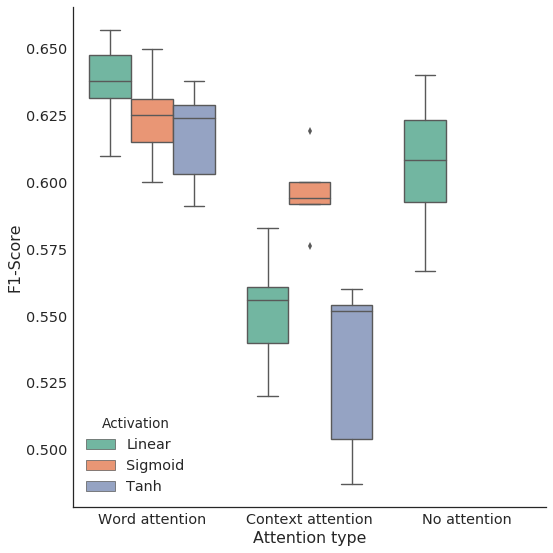

In [117]:
sns.factorplot(data=classifiers[classifiers.Config == '5 - exp'], kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False)

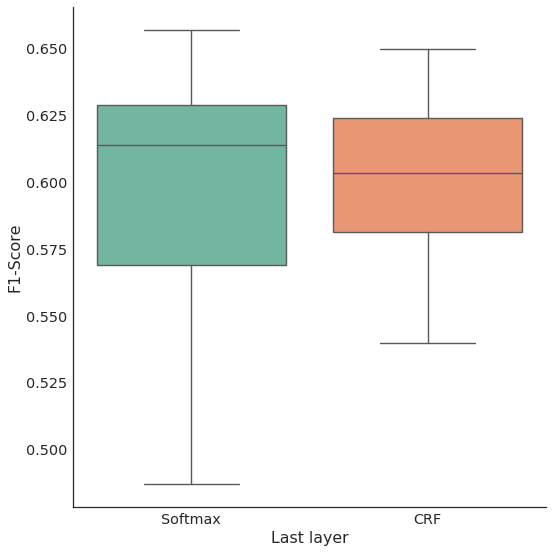

In [96]:
sns.factorplot(data=classifiers[classifiers.Config == '5 - exp'], kind='box',
               y='F1-Score', x='Last layer',# hue='Time/Feature',
               size=8, legend_out=False)

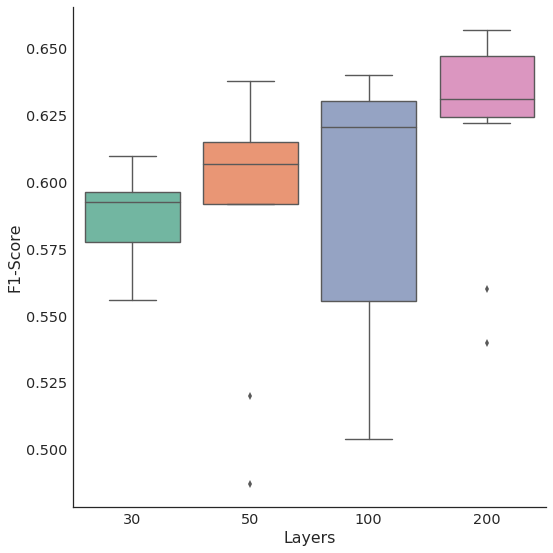

In [67]:
sns.factorplot(data=classifiers[classifiers.Config == '5 - exp'], kind='box',
               y='F1-Score', x='Layers',# hue='Time/Feature',
               size=8, legend_out=False)

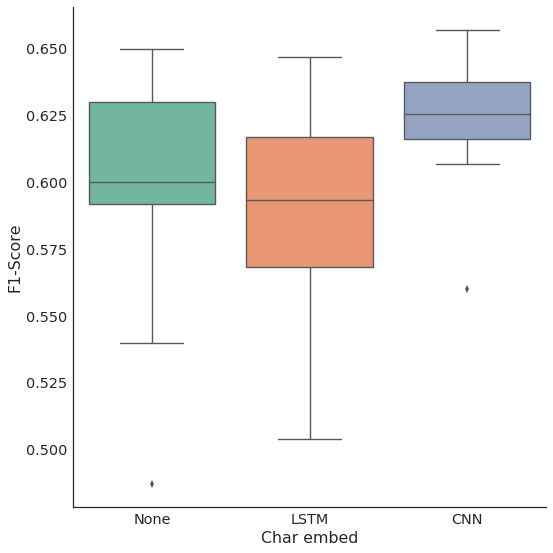

In [68]:
sns.factorplot(data=classifiers[classifiers.Config == '5 - exp'], kind='box',
               y='F1-Score', x='Char embed', # hue='Time/Feature',
               size=8, legend_out=False)

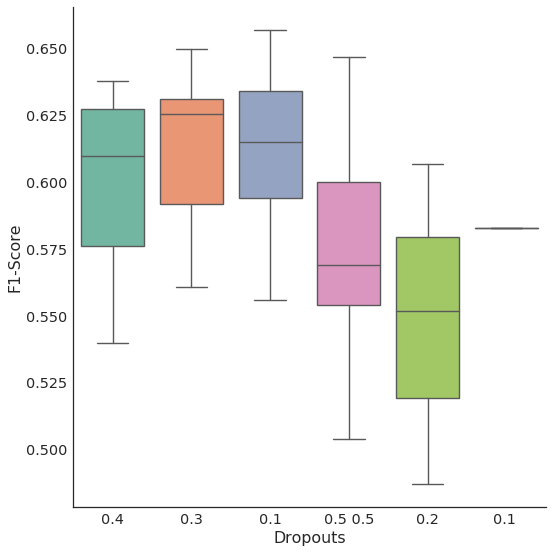

In [69]:
sns.factorplot(data=classifiers[classifiers.Config == '5 - exp'], kind='box',
               y='F1-Score', x='Dropouts',# hue='Time/Feature',
               size=8, legend_out=False)

# Essays

In [19]:
essay_results = pandas.read_csv('../../results/essays/essay_classifiers.tsv', sep='\t')
essay_results[:3]

,Name,Accuracy,Precision,Recall,F1-Score,Attention,Activation,Time/Feature,Char embed,Word emb,Char embed size,Last layer,Layers,Dropouts,Batch Size
0,18-09-02-00-31,0.693,0.681,0.693,0.678,Yes,None,Time,None,NaN,NaN,Softmax,200,0.5,50
1,18-09-02-00-45,0.697,0.699,0.697,0.697,Yes,None,Time,LSTM,NaN,32.0,CRF,50,0.4,50
2,18-09-02-01-01,0.678,0.674,0.678,0.673,Yes,None,Time,LSTM,NaN,32.0,Softmax,30,0.3,30


In [122]:
essay_results = essay_results.rename(columns={'Time/Feature': 'Attention type'})
essay_results = essay_results.replace(
    to_replace=['Time', 'Feature'], value=['Word attention', 'Context attention'])
essay_results['Attention type'] = essay_results['Attention type'].replace('-', 'No attention')
essay_results['Activation'] = essay_results['Activation'].replace('None', 'Linear')

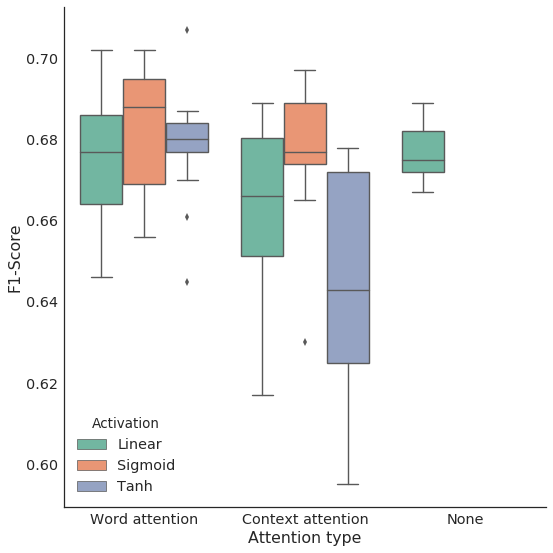

In [123]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False, dodge=True)

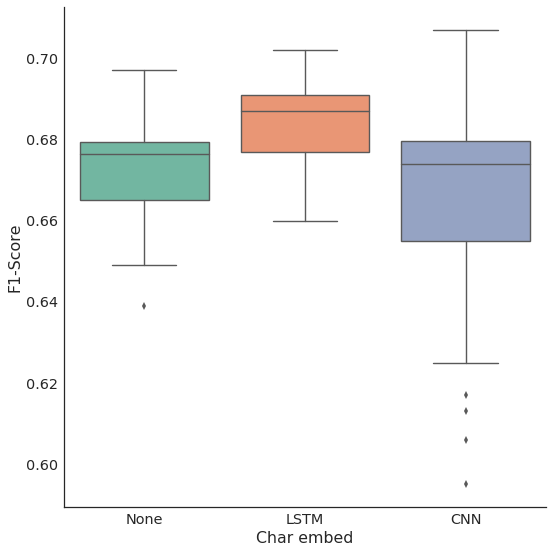

In [28]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Char embed',
               size=8, legend_out=False)

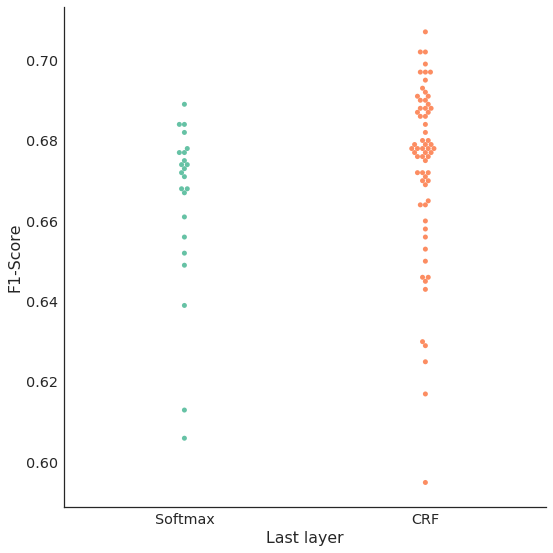

In [26]:
sns.factorplot(data=essay_results, kind='swarm', y='F1-Score', x='Last layer',
               size=8, legend_out=False)

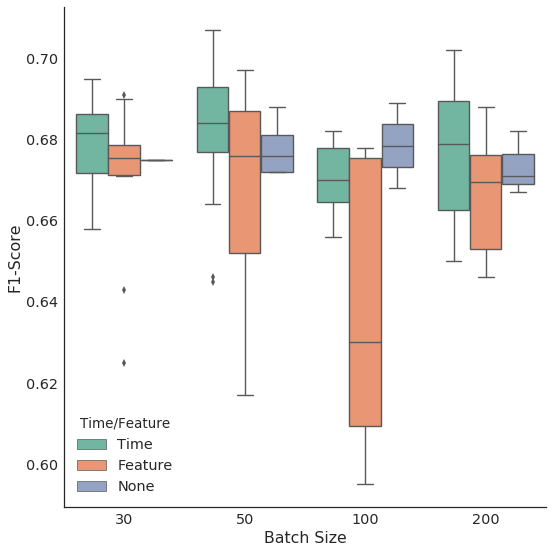

In [33]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Batch Size', hue='Time/Feature',
               size=8, legend_out=False)

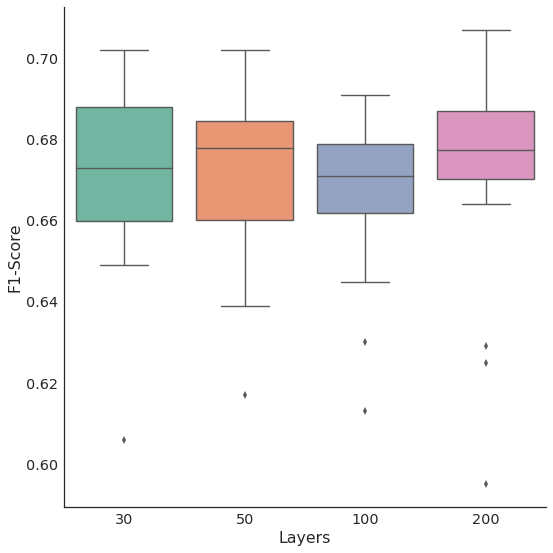

In [78]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Layers', # hue='Time/Feature',
               size=8, legend_out=False)

In [73]:
from sklearn import tree

In [74]:
treec = tree.DecisionTreeClassifier()

In [75]:
print(essay_results.columns)

Index(['Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Attention',
       'Activation', 'Time/Feature', 'Char embed', 'Word emb',
       'Char embed size', 'Last layer', 'Layers', 'Dropouts', 'Batch Size'],
      dtype='object')


In [77]:
treec.fit(essay_results[['Attention', 'Activation', 'Time/Feature', 'Char embed',
       'Char embed size', 'Last layer', 'Layers', 'Dropouts', 'Batch Size']], essay_results['F1-Score'])

ValueError: could not convert string to float: 'CRF'